In [1]:
import numpy as np             # Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score

In [2]:
Company = pd.read_csv("Company_Data.csv")  # Loading Dataset
Company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Data Understanding

In [3]:
Company.shape

(400, 11)

In [4]:
Company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
Company['ShelveLoc'] = Company['ShelveLoc'].astype('category')   # Changing Dtype from object to category
Company['Urban'] = Company['Urban'].astype('category')
Company['US'] = Company['ShelveLoc'].astype('category')

In [7]:
Company.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

### Data Preparation

In [8]:
label_encoder=preprocessing.LabelEncoder()
Company['US']=label_encoder.fit_transform(Company['US'])
Company['Urban']=label_encoder.fit_transform(Company['Urban'])
Company['ShelveLoc']=label_encoder.fit_transform(Company['ShelveLoc'])

In [9]:
Company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,2
3,7.40,117,100,4,466,97,2,55,14,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0


In [10]:
Company['Sales'] = Company['Sales'].map(lambda x:1 if x>8 else 0)
Company['Sales']

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

### Data Visualization

<AxesSubplot:>

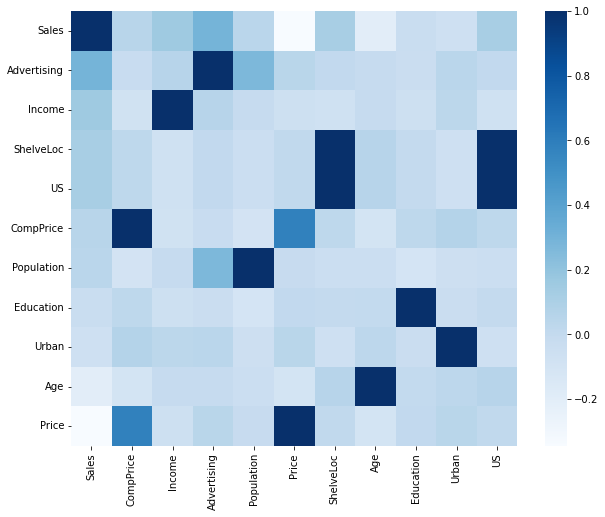

In [11]:
corr = Company.corr().sort_values(by='Sales',ascending=False)   # Correlation 
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='Blues')

### Model Building

In [12]:
X = Company.drop(labels = 'Sales', axis = 1)
y = Company[['Sales']]

In [13]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,0
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,2
3,117,100,4,466,97,2,55,14,1,2
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,2
397,162,26,12,368,159,2,40,18,1,2
398,100,79,7,284,95,0,50,12,1,0


In [14]:
y

,Sales
0,1
1,1
2,1
3,0
4,0
...,...
395,1
396,0
397,0
398,0


### Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 12)

In [16]:
X_train.shape, y_train.shape

((320, 10), (320, 1))

In [17]:
X_test.shape, y_test.shape

((80, 10), (80, 1))

### Model Training

In [18]:
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 5)
rf_model.fit(X_train, y_train)

C:\Users\NIRAJP~1\AppData\Local\Temp/ipykernel_63180/4122776899.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5)

In [19]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

C:\Users\NIRAJP~1\AppData\Local\Temp/ipykernel_63180/217048030.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier()

### Model Testing

In [20]:
y_train_pred = rf_model.predict(X_train) 

In [21]:
y_test_pred = rf_model.predict(X_test)

In [22]:
accuracy_score(y_train, y_train_pred)

1.0

In [23]:
confusion_matrix(y_train, y_train_pred)

array([[187,   0],
       [  0, 133]], dtype=int64)

In [24]:
precision_score(y_train, y_train_pred)

1.0

In [25]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       133

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



1.0


Text(0, 0.5, 'True Positive Rate')

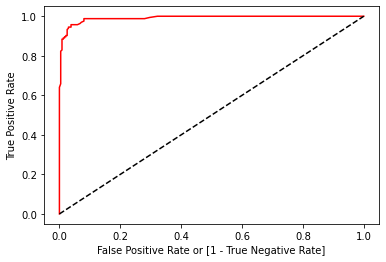

In [26]:
fpr, tpr, thresholds = roc_curve(y, rf_model.predict_proba (X)[:,1])
auc = roc_auc_score(y_train, y_train_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color ='red', label = 'logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Testing Data

In [27]:
accuracy_score(y_test,y_test_pred)

0.725

In [28]:
confusion_matrix(y_test,y_test_pred)

array([[43,  6],
       [16, 15]], dtype=int64)

In [29]:
precision_score(y_test,y_test_pred)

0.7142857142857143

In [30]:
recall_score(y_test,y_test_pred)

0.4838709677419355